## Sample vs. Population

In the first example consider $X \sim U[0,1]$, i.e., $X$ comes from the uniform distribution on the interval $[0,1]$. 

**Task 1 (Estimate of identity function)**: Given i.i.d. samples $x_1, \dots, x_n$ compute $\mathbb{E}[X]$. Show empirically that your estimate is unbiased and its variance goes to zero. 

In [1]:
import numpy as np

# Sampls from i.i.d. uniform distribution

# Example of generating 10 samples from uniform distribution
n = 10
x = np.random.uniform(size=n)

n_s = [10, 100, 1000, 10000]

for n in n_s:
    trials = 100
    means = []
    for i in range(trials):
        x = np.random.uniform(size=n)
        means.append(np.mean(x))
    print(f"n = {n:6d}, mean = {np.mean(means):.4f}, std = {np.std(means):4f}")

n =     10, mean = 0.4913, std = 0.086656
n =    100, mean = 0.4986, std = 0.028202
n =   1000, mean = 0.4996, std = 0.009094
n =  10000, mean = 0.5001, std = 0.002836


**Task 2 (No generalization)**: Given the same distribution for $X$, assume that $Y \in \{0, 1\}$ is independent of $X$ and equals to both values with probability $\frac{1}{2}$. Given $loss$ is equal to the square loss, select a function/predictor class $\mathcal{F}$ for which you can achieve zero empirical loss (be creative). Also, estimate population risk of the constructed predictor. 

In [2]:
n = 100
x = np.random.uniform(size=n)
y = np.random.choice([0, 1], size=n)

def square_loss(y, y_hat):
    return np.mean((y - y_hat)**2)

# construct a model that has zero error
def construct_predictor(x, y):
    sorted_x = np.sort(x)
    sorted_y = y[np.argsort(x)]
    # predict value that is closest to the value in our training dataset
    def predictor(x):
        return sorted_y[np.argmin(np.abs(sorted_x - x))]
    return predictor

# What is your predictor class?
# In this case, our predictor class is any piecewise constant function

# Compute the training error
predictor = construct_predictor(x, y)
y_hat = np.array([predictor(x_i) for x_i in x])
print(f"Training error: {square_loss(y, y_hat):.4f}")

# Estimate the population error
n_fresh = 10000
x_fresh = np.random.uniform(size=n_fresh)
y_fresh = np.random.choice([0, 1], size=n_fresh)

y_hat_fresh = np.array([predictor(x_i) for x_i in x_fresh])
print(f"Population error: {square_loss(y_fresh, y_hat_fresh):.4f}")

Training error: 0.0000
Population error: 0.4954


### Perceptron Algorithm

**Taks 3**: Generate and visualize data, where $X|Y=0$ is uniformly distribution on $[-2, -1] \times [-0.5, 0.5]$ and $X|Y=0$ is uniformly distribution on $[1, 2] \times [-0.5, 0.5]$. Are this data separable? 

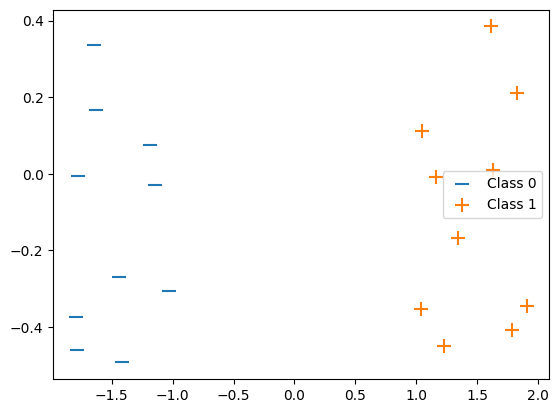

In [3]:
import matplotlib.pyplot as plt

n = 10

def get_negative_samples(n):
    shift = np.array([-2, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

def get_positive_samples(n):
    shift = np.array([1, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

x_0 = get_negative_samples(n)
x_1 = get_positive_samples(n)
X = np.concatenate([x_0, x_1])
y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])

# zero as - and one as +
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.legend()
plt.show()

**Task 4**: Compute diameter of the dataset. Can you provide some meaningful lower bound on the margin of dataset?  

Diameter of dataset X: 1.9376


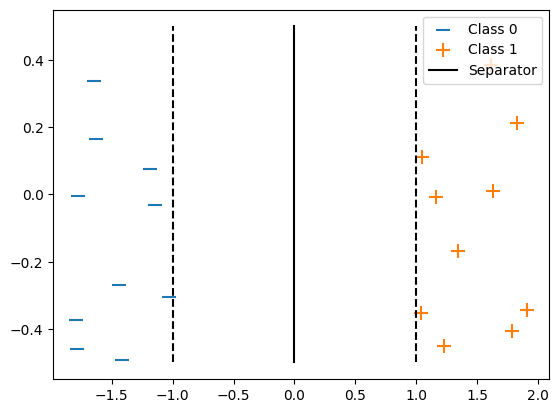

In [4]:
def diameter(X):
    return np.max(np.linalg.norm(X, axis=1))

print(f"Diameter of dataset X: {diameter(X):.4f}")

# Lower bound on the margin
# There are no data for the first coordinate on the interval 0 to 1
# Therefore, a good estimate might be 1/2 with separator as below

plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.plot([0, 0], [-0.5, 0.5], 'k-', label="Separator")
plt.plot([-1, -1], [-0.5, 0.5], 'k--')
plt.plot([1, 1], [-0.5, 0.5], 'k--')
plt.legend()
plt.show()

**Task 5**: Implement and visualize the perceptron algorithm. 

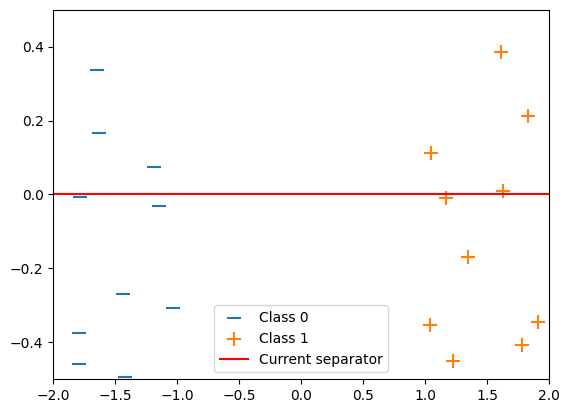

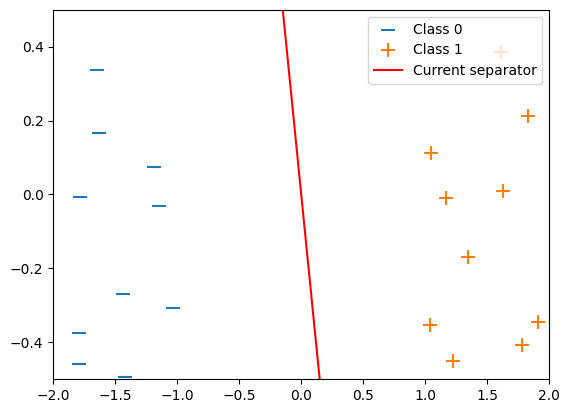

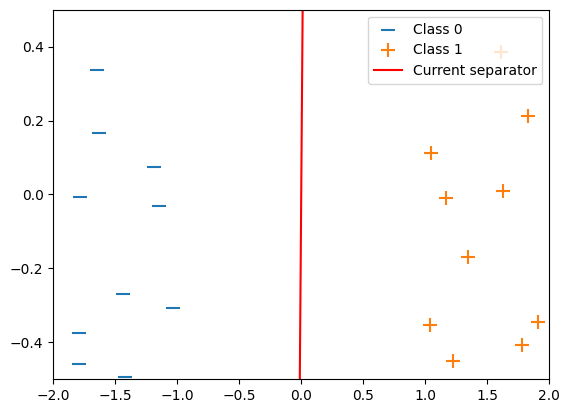

In [5]:
w = np.zeros(2)
# visualize the current separator
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.plot([-2, 2], [0, 0], 'r-', label="Current separator")
plt.ylim([-1/2, 1/2])
plt.xlim([-2, 2])
plt.legend()
plt.show()

# stopping criteria is when we predict all points correctly
while (X.dot(w) * y < 1).any():
    # pick a random misclassified point
    # note this is equivalent to pick from all the points
    i = np.random.choice(np.where(X.dot(w) * y < 1)[0])
    # update the weight vector
    w += y[i] * X[i]
    # visualize the current separator
    plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
    plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
    plt.plot([-2, 2], [2 * w[0] / w[1], -2* w[0] / w[1]], 'r-', label="Current separator")
    plt.legend()
    plt.ylim([-1/2, 1/2])
    plt.xlim([-2, 2])
    plt.show()

# We converge to a separator

**Task 6**: Generate and visualize data, where $X|Y=0$ is uniformly distribution on $[0, 1] \times [-0.5, 0.5]$ and $X|Y=0$ is uniformly distribution on $[3, 4] \times [-0.5, 0.5]$. Are this data separable by hyperplane as defined in the lecture?  

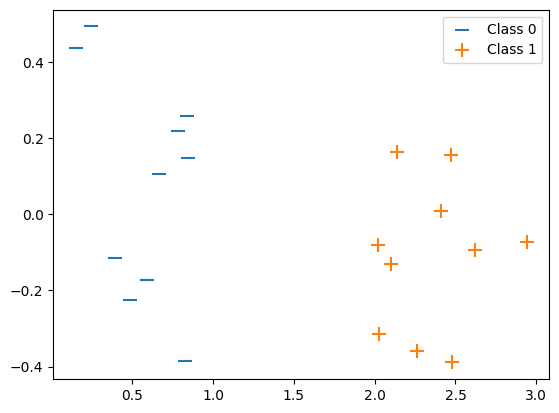

In [6]:
n = 10

def get_negative_samples(n):
    shift = np.array([0, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

def get_positive_samples(n):
    shift = np.array([2, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

x_0 = get_negative_samples(n)
x_1 = get_positive_samples(n)
X = np.concatenate([x_0, x_1])
y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])

# zero as - and one as +
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.legend()
plt.show()

# These data are not separable by hyperplane w^\top x = 0

**Task 7**: Use the Perceptron algorithm to solve this problem. Does it work? 

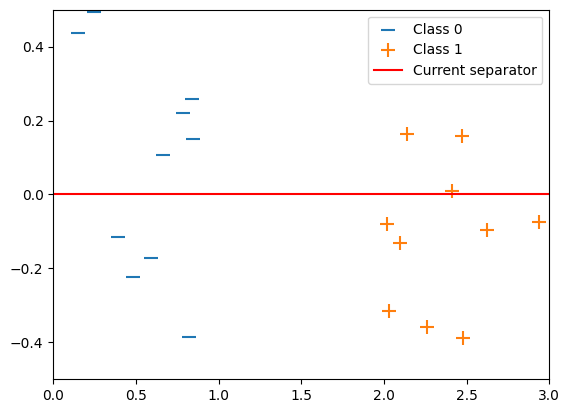

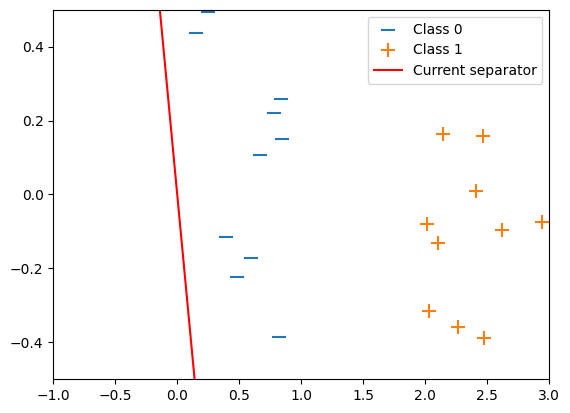

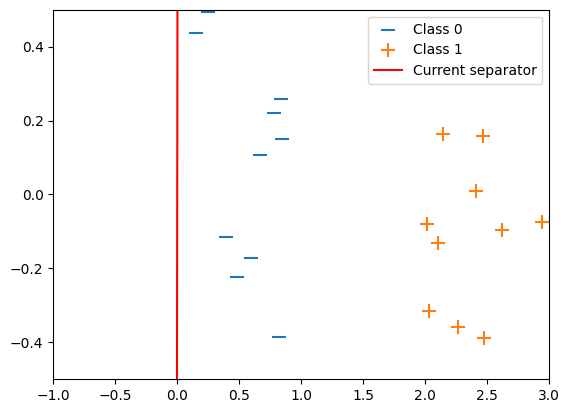

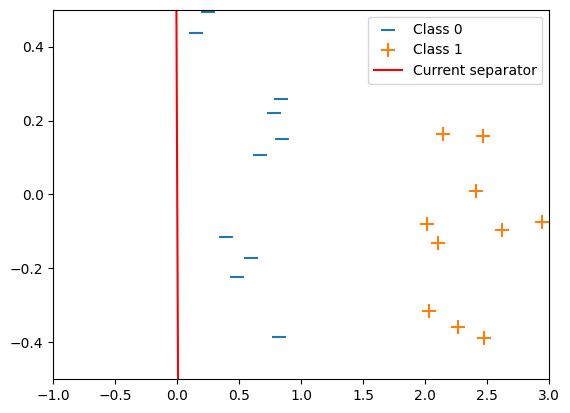

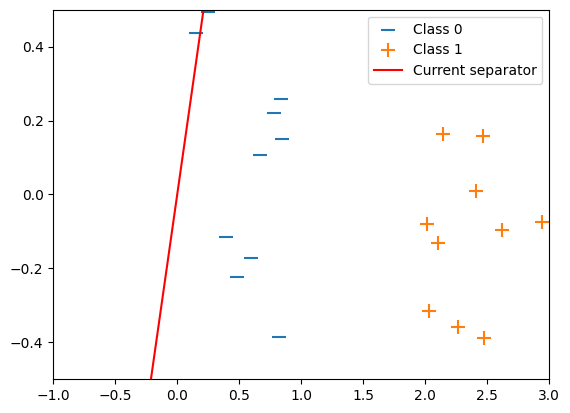

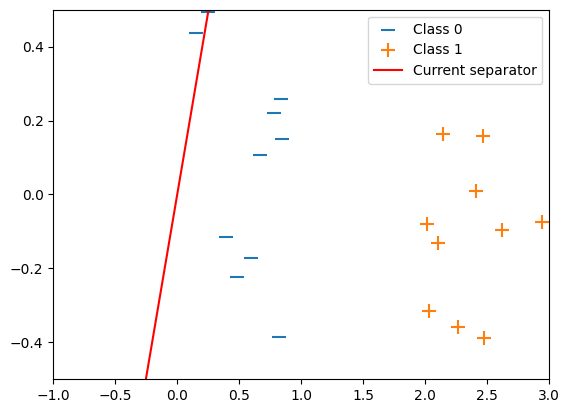

In [7]:
w = np.zeros(2)
# visualize the current separator
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.plot([-1, 3], [0, 0], 'r-', label="Current separator")
plt.ylim([-1/2, 1/2])
plt.xlim([0, 3])
plt.legend()
plt.show()


iter = 0
max_iter = 5
# stopping criteria is when we predict all points correctly
while (X.dot(w) * y < 1).any():
    # pick a random misclassified point
    # note this is equivalent to pick from all the points
    i = np.random.choice(np.where(X.dot(w) * y < 1)[0])
    # update the weight vector
    w += y[i] * X[i]
    # visualize the current separator
    plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
    plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
    plt.plot([-1, 3], [1 * w[0] / w[1], -3 * w[0] / w[1]], 'r-', label="Current separator")
    plt.legend()
    plt.ylim([-1/2, 1/2])
    plt.xlim([-1, 3])
    plt.show()
    iter += 1
    if iter >= max_iter:
        break

# We do not converge

**Task 8**: Can you make the perceptron algorithm work for this dataset?

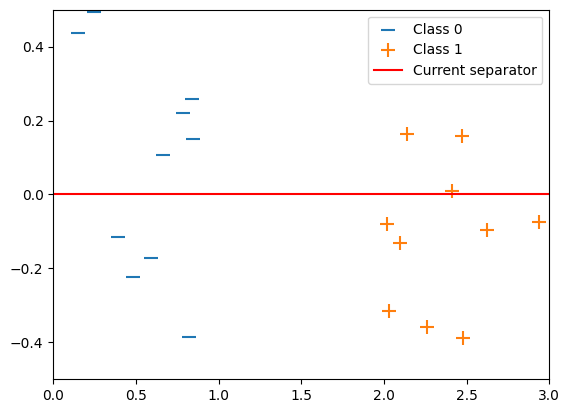

Separation: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


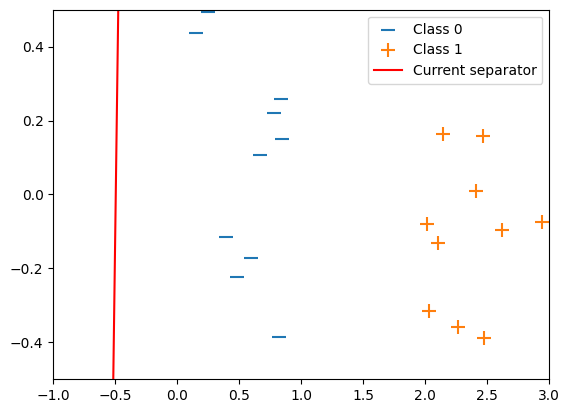

Separation: [-2.69686563 -2.69155639 -2.67251828 -1.99492517 -1.79506145 -1.45690034
 -1.26598043 -2.56055056 -2.33274682 -2.21075383  5.11828064  5.86257137
  5.30650452  5.24693191  5.07734264  5.97034365  6.0296402   6.93968879
  6.29886498  5.5926624 ]


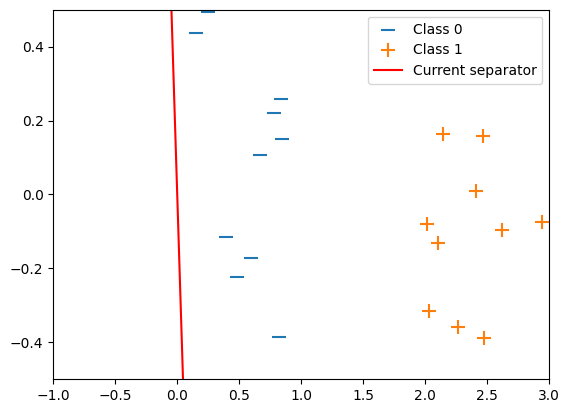

Separation: [-1.32024928 -1.20665686 -1.32419079 -0.71039544 -0.58057645 -0.44824427
 -0.29148254 -1.23091197 -1.03489612 -0.88507202  3.06558941  3.69783253
  3.30674497  3.20110567  3.08241747  3.80979794  3.74314853  4.49945524
  4.00797408  3.41728954]


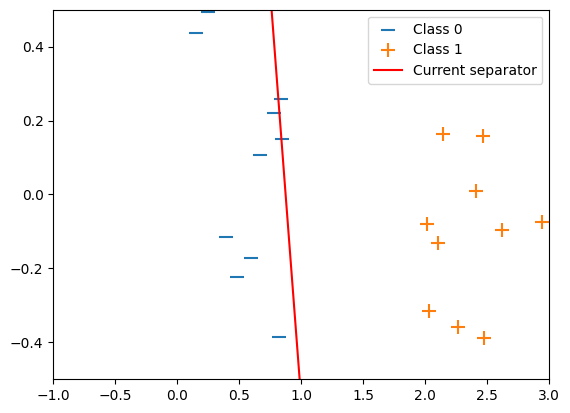

Separation: [-0.00773275  0.15856954 -0.0273828   0.50408956  0.58450118  0.59041214
  0.71604139  0.04829696  0.21156504  0.36585173  1.23911221  1.76034396
  1.49205336  1.36830634  1.28735602  1.86624924  1.73336119  2.34572287
  1.97575273  1.49491315]


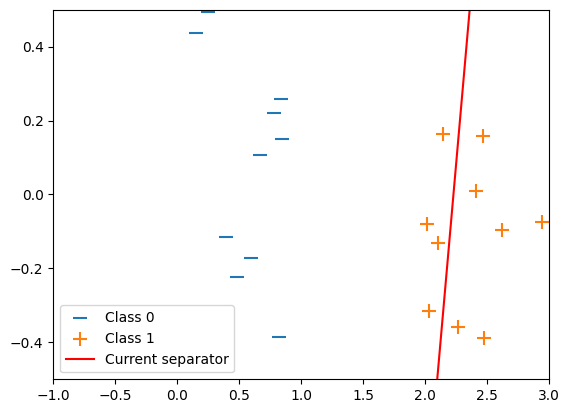

Separation: [ 1.27462497  1.17046289  1.30728451  1.51274562  1.6231576   1.89486933
  1.96849491  1.34915683  1.4282851   1.42704718 -0.10471169  0.16178191
 -0.116336   -0.08415444 -0.16954432  0.18051751  0.31552887  0.65764938
  0.37679438  0.1149887 ]


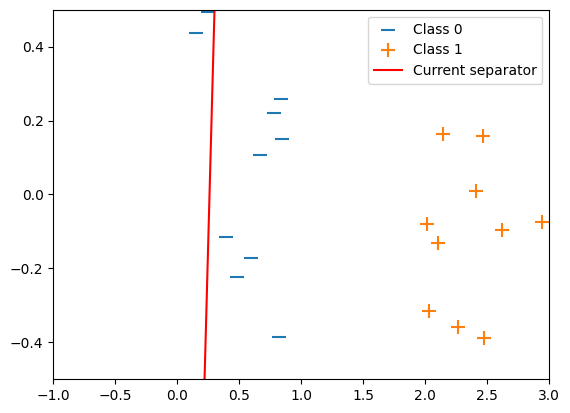

Separation: [-2.20547778 -2.27794929 -2.14223583 -0.92748793 -0.53057477  0.20679584
  0.56126213 -1.9353667  -1.51918119 -1.33011282  6.8841687   8.25012079
  7.16835359  7.10050327  6.77014447  8.43252019  8.62954081 10.31231572
  9.09640131  7.79341281]


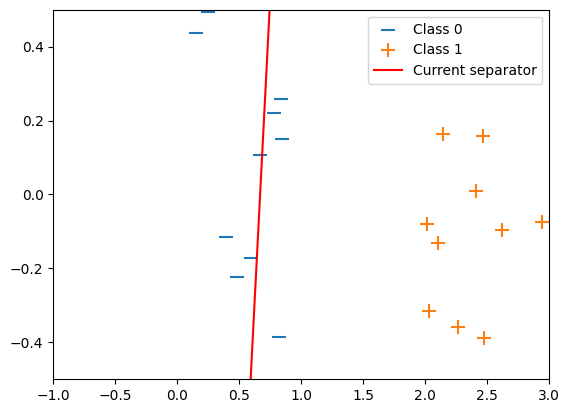

Separation: [-0.465721   -0.63866004 -0.39257268  0.44912842  0.78194176  1.48915357
  1.75302007 -0.24004194  0.05999812  0.14664836  4.2131067   5.20692587
  4.33031122  4.34159539  4.07327884  5.31713281  5.58943602  6.83221297
  5.88929071  4.93113828]


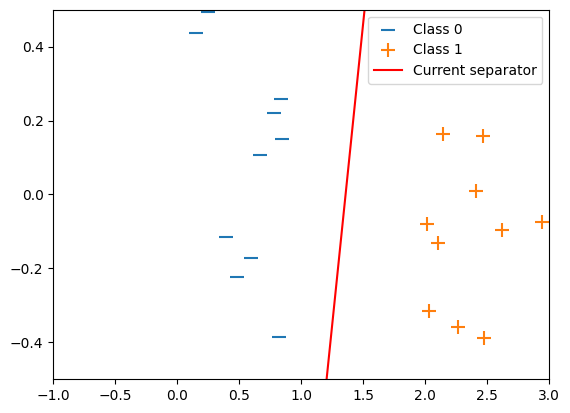

Separation: [1.22960377 0.92038177 1.32081295 1.77876701 2.06115069 2.79001343
 2.9655806  1.41991309 1.60360646 1.57299775 1.69542145 2.31913995
 1.61946591 1.72779903 1.51272828 2.35074226 2.73692687 3.54768944
 2.85864315 2.24037522]


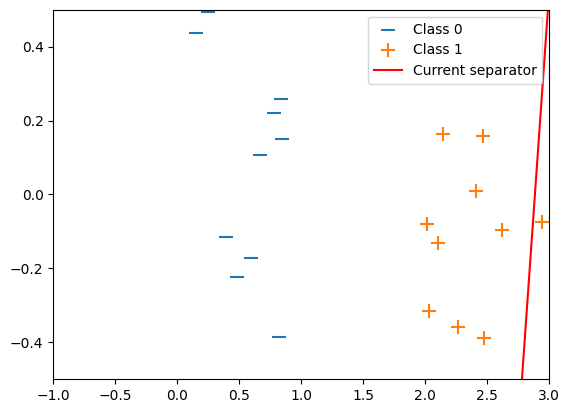

Separation: [ 2.86889301  2.74678119  2.9113923   3.26366654  3.42637709  3.80190677
  3.91974     2.9789549   3.10925647  3.1275473  -1.09565973 -0.66053264
 -1.07890717 -1.05055994 -1.17882811 -0.62096403 -0.45197169  0.09927727
 -0.33605189 -0.75947754]


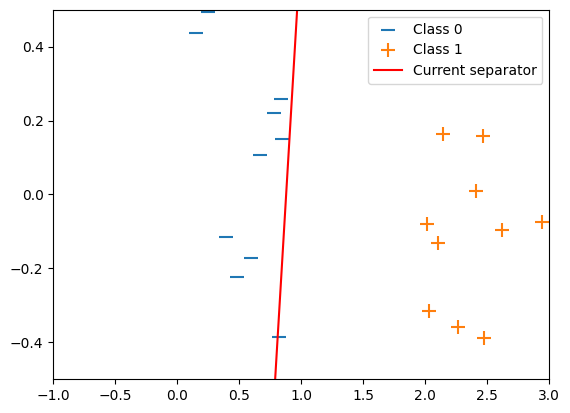

Separation: [ 0.19783101 -0.04429999  0.2904928   1.21097532  1.59989989  2.45808287
  2.75453169  0.46126965  0.79443073  0.87003372  4.11863674  5.22592542
  4.21238493  4.24990456  3.93945253  5.33946012  5.69589794  7.08815766
  6.01361074  4.94188878]


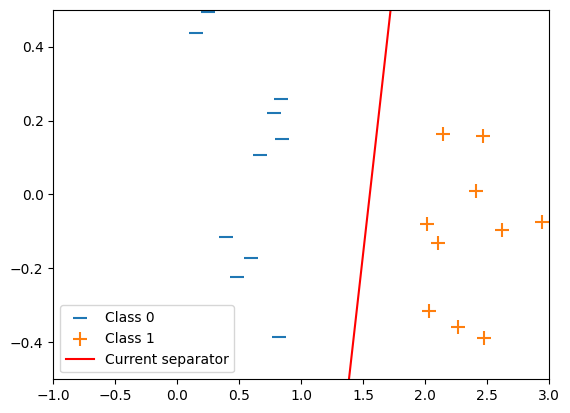

Separation: [1.94749417 1.54627936 2.06216855 2.55930281 2.89670788 3.79275018
 3.99308721 2.17465527 2.38029355 2.32337913 1.49773724 2.20010313
 1.37271742 1.52145144 1.26693425 2.22576975 2.71750812 3.63863732
 2.83701677 2.13631648]


In [8]:
# Yes, we can use the same algorithm, but realizing that while the data are not separable 
# by a hyperplane, they are separable by hyperplane w^\top x = 0, they are separable by a
# hyperplane w^\top x + c = 0. We can use the same algorithm, but we need to add an additional
# 1 to the data points.
X_ext = np.concatenate([X, np.ones((len(X), 1))], axis=1)

w = np.zeros(3)
# visualize the current separator
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.plot([-1, 3], [0, 0], 'r-', label="Current separator")
plt.ylim([-1/2, 1/2])
plt.xlim([0, 3])
plt.legend()
plt.show()

print(f"Separation: {X_ext.dot(w) * y}")


iter = 0
max_iter = 50
# stopping criteria is when we predict all points correctly
while (X_ext.dot(w) * y < 1).any():
    # pick a random misclassified point
    # note this is equivalent to pick from all the points
    i = np.random.choice(np.where(X_ext.dot(w) * y < 1)[0])
    # update the weight vector
    w += y[i] * X_ext[i]
    # visualize the current separator
    plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
    plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
    plt.plot([-1, 3], [(1 * w[0] - w[2]) / w[1], (-3 * w[0] - w[2]) / w[1]], 'r-', label="Current separator")
    plt.legend()
    plt.ylim([-1/2, 1/2])
    plt.xlim([-1, 3])
    plt.show()
    print(f"Separation: {X_ext.dot(w) * y}")
    iter += 1
    if iter >= max_iter:
        break

# We again converge to a separator